### Linear regression from scratch

In [1]:
#import packages
from __future__ import print_function
import numpy as np

In [2]:
#Define Parameters
num_inputs = 2
num_outputs = 1
num_examples = 10000
input_mean = [0, 0]
input_variance = [[1, 0],[0, 1]]
noise_mean = 0
noise_variance = 0.01
#
def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2
    
X = np.random.multivariate_normal(input_mean, input_variance, num_examples)
X /= np.max(X)
noise = np.random.normal(noise_mean, noise_variance, num_examples)
y = real_fn(X) + noise

In [3]:
#print X and Y
print(X[0])
print(y[0])

[ 0.24470042  0.22835131]
3.91519102645


In [4]:
print(2 * X[0, 0] - 3.4 * X[0, 1] + 4.2)

3.913006397


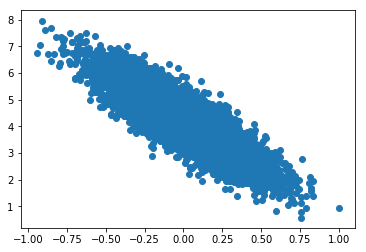

In [5]:
#Visualise data
import matplotlib.pyplot as plt
plt.scatter(X[:, 1], y)
plt.show()

### Data iterators

In [6]:
from bigdl.util.common import *
rdd = to_sample_rdd(X, y)

In [7]:
from pyspark import SparkContext
from bigdl.util.common import *
#Create Session
sc=SparkContext.getOrCreate(conf=create_spark_conf().setMaster("local[4]").set("spark.driver.memory","2g"))

print(sc.defaultParallelism)
rdd.getNumPartitions()

4


4

In [8]:
rdd = to_sample_rdd(X, y, 8)
rdd.getNumPartitions()

8

In [9]:
def printFeatureLabelPairs(record):
        print('features: '+str(record.features)+' label: '+str(record.label))
rdd.foreach(printFeatureLabelPairs)

In [10]:
#Model parameters
w = np.random.multivariate_normal(input_mean, input_variance, num_examples)
b = np.random.normal(0, 1, num_examples)
params = [w, b]

In [27]:
#Neural networks
def net(X):
    return w.dot(X.transpose()) + b

In [28]:
#Define Loss function
def square_loss(yhat, y): 
    return np.mean((yhat - y) ** 2)

In [29]:
#Optimizer
def get_gradient(w, x, y):
    y_estimate = net(x)
    error = y - y_estimate
    gradient = -(1.0/len(x)) * error.dot(x)
    loss= square_loss(y, y_estimate)
    return gradient, loss

In [30]:
lr = 0.01
tolerance = 1e-3

# Perform Gradient Descent
epochs = 1
while True:
    gradient, loss = get_gradient(w, X, y)
    new_w = w - lr * gradient
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print("Converged.")
        break
    
    # Print error every 50 iterations
    if epochs % 3 == 0:
        print("Iteration: %d - Loss: %.4f" %(epochs, loss))
    
    epochs += 1
    w = new_w

Converged.
